In [1]:
import sys

import numpy as np

from stixdcpy.quicklook import LightCurves
from stixdcpy.energylut import EnergyLUT
from stixdcpy.housekeeping import Housekeeping
from stixdcpy import ancillarydata as anc
from stixdcpy.sciencedata import SciL1, SciSpectrogram

from matplotlib import pyplot as plt

from pprint import pprint
%matplotlib notebook

In [2]:
elut=EnergyLUT.request('2021-09-03T00:00:00')

In [3]:
#Print onboard elut and calibration run information
elut.info()
#elut.data


{'calibration_run': {'duration': 86400,
                     'obs_begin': '2021-09-02T12:56:17.958',
                     'run_id': 1353},
 'onboard_elut': {'upload_time_range': ['2021-06-25T14:54:14.456',
                                        '2021-06-25T14:55:49.456']}}


In [4]:
#emph=anc.Ephemeris.request(start_utc='2021-02-28T00:00:00', end_utc='2021-2-28T01:00:00',steps=2)
#emph.peek()

In [5]:
#emph.data


In [6]:
request_id=	2108010255
sci_data=SciL1.fetch(request_id=request_id)
#Bulk science data request ids (or also called unique ids) can be found on the science data web page at STIX data center

In [7]:
data=sci_data.data
#data is a fits file object
data.info()
data[0].header['DATE_BEG']


Filename: /tmp/tmphfhrp1j4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  CONTROL       1 BinTableHDU     31   1R x 8C   [J, J, J, 3B, 3B, D, K, 32B]   
  2  DATA          1 BinTableHDU     45   180R x 12C   ['D', 'D', 'B', '144B', '32B', 'B', 'B', '16K', '16D', '12288D', '12288D', 'K']   
  3  ENERGIES      1 BinTableHDU     19   32R x 3C   ['K', 'D', 'D']   


'2021-08-01T15:02:29.681'

<IPython.core.display.Javascript object>


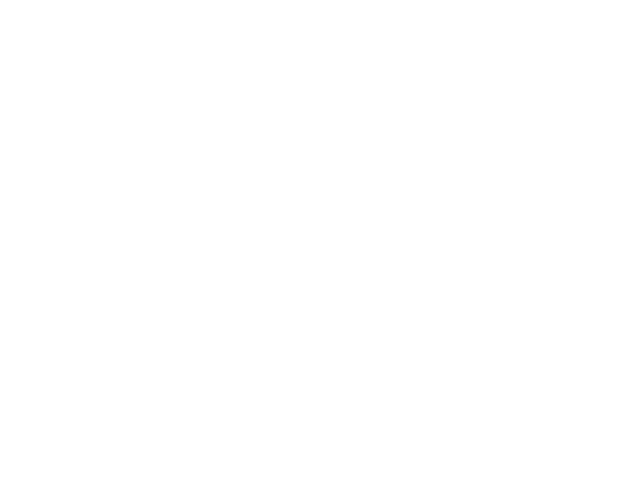

NameError: name 'request_id' is not defined

In [8]:
sci_data.peek()
#science data quicklook

In [ ]:
data.info()


In [ ]:
#fig=plt.figure()
l1data=data[2].data
#print(l1data['num_energy_groups'])
print(l1data['counts'].shape)
print(l1data['timedel'].shape)
print(l1data['triggers'])
trigger_rates=l1data['triggers'][1:,:]/l1data['timedel'][:-1,None]

tau=9.6e-6
eta=1e-5
live_time=1 - tau*trigger_rates
photo_in_rates=trigger_rates /(1-tau*trigger_rates)

counts=l1data['counts'][1:,:,:,:]/l1data['timedel'][:-1,None, None, None]

print('counts shape:', counts.shape)
#print(counts.shape)
print('triggers shape:', trigger_rates.shape)
out=np.zeros_like(counts)







In [ ]:
print(counts.shape)


DET_GROUPS = [
	[1, 2],
	[6, 7],
	[5, 11],
	[12, 13],
	[14, 15],
	[10, 16],
	[8, 9],
	[3, 4],
	[31, 32],
	[26, 27],
	[22, 28],
	[20, 21],
	[18, 19],
	[17, 23],
	[24, 25],
	[29, 30]
]
for i, dets in enumerate(DET_GROUPS):
    if i>=2:
        break
    #    continue
    d1,d2=dets[0]-1,dets[1]-1
    #trig=
    fig=plt.figure()
    #print(i, d1,d2)
    trig=trigger_rates[:,i]
    count_sum=np.sum(counts[:,d1,:,:]+ counts[:,d2,:,:], axis=(1,2))
    #plt.plot(trig, label=f'trig {i}')
    ratio=count_sum/trig
    #plt.plot(count_sum,label=f'counts of D{d1}+D{d2}')
    plt.plot(count_sum/trig,label=f'trig #{i} / counts of D{d1}+D{d2}')
    #most of the counts are not recorded at the begining due to the energy range 
    plt.legend()
    #break
    
    
    

    #print(i, '#', trig)
    #print(count_sum)
    #print(l1data['timedel'])


sci_data.spectrogram[1:, :]

In [ ]:
x=np.arange(32).reshape((4,8))
x,x[:,None]

In [7]:
request_id=	2108150003
l4d=SciSpectrogram.fetch(request_id=request_id)

Filename: /tmp/tmpjq60th6p.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  CONTROL       1 BinTableHDU     41   1R x 12C   [J, J, J, 3B, 3B, D, J, 12B, 32B, I, K, 32B]   
  2  DATA          1 BinTableHDU     31   166R x 7C   ['D', 'D', 'K', 'D', '32D', '32D', 'K']   
  3  ENERGIES      1 BinTableHDU     19   32R x 3C   ['K', 'D', 'D']   


<IPython.core.display.Javascript object>


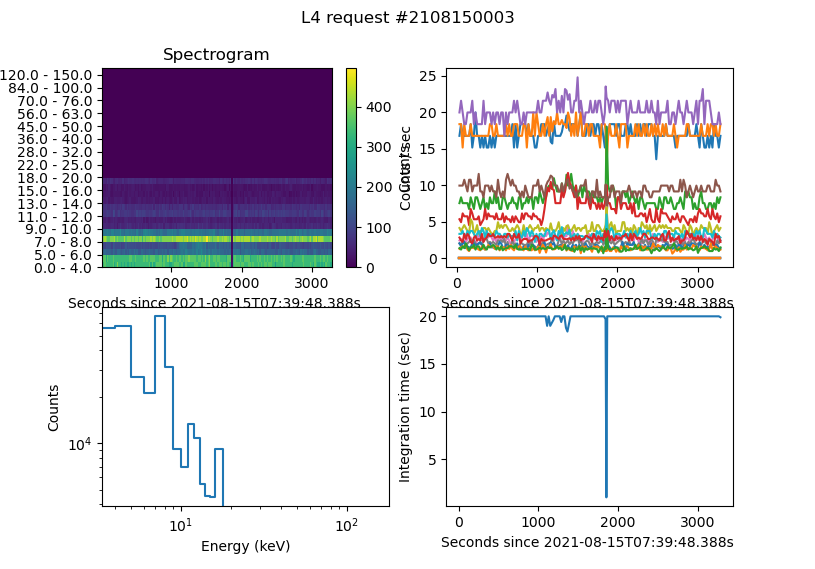

(<Figure size 640x480 with 5 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7e83a2ee0>,
       dtype=object))

In [8]:
l4d.data.info()
l4d.peek()

<IPython.core.display.Javascript object>


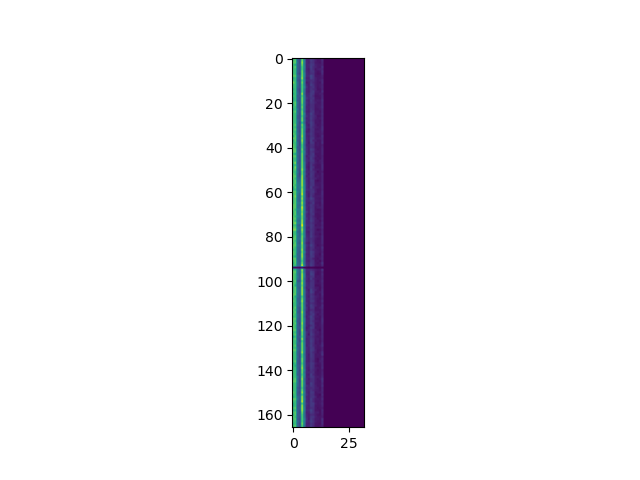